### Importing necessary tools

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

pd.options.display.float_format = '{:20.2f}'.format

pd.set_option("display.max_columns", 999)

Source: https://archive.ics.uci.edu/dataset/502/online+retail+ii

Variable info: 
  - InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'C', it indicates a cancellation. 
  - StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. 
  - Description: Product (item) name. Nominal. 
  - Quantity: The quantities of each product (item) per transaction. Numeric.	
  - InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated. 
  - UnitPrice: Unit price. Numeric. Product price per unit in sterling (£). 
  - Country: Country name. Nominal. The name of the country where a customer resides.

In [201]:
df = pd.read_excel(r'D:\Personal_Python_Projects\JUPYTER FOLDER\Online Retail\online_retail_II.xlsx', sheet_name = 0)

# Exploratory Data Analysis 🕵️‍♂️

In [202]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [203]:
df.info()
#Looks like customer ID is missing some data 😿, but we don't need to convert Inovice Date to date time luckily 😼

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [204]:
df.describe()
#Interesting that quantity and price have negative values

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [205]:
df.describe(include = 'O')
#Lets us look at non numeric data

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [206]:
df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [207]:
df[df['Quantity'] < 0].head(10)
#According to the data description, the C in the Invoice number means there was a cancellation
#Maybe that is the negative quantity then, showing a returned product

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [208]:
df['Invoice'] = df['Invoice'].astype('str')
df[df['Invoice'].str.match('^\\d{6}$') == True] #Looks for a 6 digits number in the invoice column. We are making sure that this is how they are all formatted
#The ^ and $ are anchors and need to be at the start and end.
#For example if you have 'Invoice': ['123456', '00123456', '123450981', '123456789', 'abc123456'], not using the ^ and $ would pick all of these up while using them would only get 123456

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [209]:
#But we really wanted to see where that doesn't hold true
df[df['Invoice'].str.match('^\\d{6}$') == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [210]:
#And now lets check what letters there might be besides the C for cancelled
df['Invoice'].str.replace("[0-9]", '', regex = True).unique()

#Looks like we got an A too 😳

array(['', 'C', 'A'], dtype=object)

In [211]:
df[df['Invoice'].str.startswith('A')]
#Looks like A is for adjust? Will probably just drop these later

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [212]:
#Now we will confirm that stock code is all 5 digits like the dataset claims it is
df['StockCode'] = df['StockCode'].astype('str')
df[df['StockCode'].str.match('^\\d{5}$') == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.00,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.00,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.00,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.00,United Kingdom


Looks like we got some letters at the end of some stock codes, but the transactions look valid, but lets look further

In [213]:
#This checks to see other stock codes, besides the ones with those letters at the end
df[(df['StockCode'].str.match('^\\d{5}$') == False) & (df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$') == False)]['StockCode'].unique()
#(^\\d{5}[a-zA-Z]+$) this checks the 5 digits and then allows for unlimited letters to show up (that's what the + is for)

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [214]:
#Let's look through some of the wierd stock codes
df[df['StockCode'].str.contains('^SP1002$', na = False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
377066,525772,SP1002,KID'S CHALKBOARD/EASEL,1,2010-10-07 11:12:00,2.95,12748.00,United Kingdom
377387,525837,SP1002,KID'S CHALKBOARD/EASEL,4,2010-10-07 12:23:00,2.95,17841.00,United Kingdom
426694,530135,SP1002,NaN,-27,2010-11-01 15:33:00,0.00,NaN,United Kingdom


### Stock Code Rules

StockCode is meant to follow the pattern `[0-9]{5}` but seems to have legitimate values for `[0-9]{5}[a-zA-Z]+`

Also contains other values: 

| Code | Description | Action | 
|------|-------------|--------| 
| DCGS | Looks valid, but Customer ID is null | Exclude from clustering | 
| D | Discount, values are negative | Exclude from clustering | 
| DOT | Postage charges | Exclude from clustering | 
| M or m | Manual | Exclude from clustering | 
| C2 | CARRAIGE. Some Customer ID values are null | Exclude from clustering | 
| C3 | Only 1 transaction with negative quantity and null Customer ID | Exclude | 
| BANK CHARGES or B | Bank charges | Exclude from clustering | 
| S | Samples sent to customers, with null Customer ID | Exclude from clustering | 
| TESTXXX | Testing data | Exclude | 
| gift__XXX | Purchases with gift cards, no customer data | Exclude | 
| PADS | Looks like a legit stock code for padding | Include | 
| SP1002 | Only 3 transactions, 2 look legit, 1 has no price and a null customer ID| Exclude |
| AMAZONFEE | Fees for Amazon shipping or something | Exclude | 
| ADJUSTX | Manual account adjustments by admins | Exclude  |

# Data Cleaning 🧼

In [215]:
cdf = df.copy() #Copy the df to retain the original. cdf stands for 'cleaned df'

In [216]:
cdf['Invoice'] = cdf['Invoice'].astype('str')

mask = (cdf['Invoice'].str.match('^\\d{6}$') == True) #Filtering out the invoices starting with C and A

cdf = cdf[mask]

cdf

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [217]:
cdf['Invoice'].str.replace("[0-9]", '', regex = True).unique()

array([''], dtype=object)

Looks like the filter worked since we aren't seeing the C or the A show up here

In [218]:
cdf['StockCode'] = cdf['StockCode'].astype('str')

mask = (
    (cdf['StockCode'].str.match('^\\d{5}$') == True) 
| (cdf['StockCode'].str.match('^\\d{5}[a-zA-Z]+$') == True) 
|(cdf['StockCode'].str.match('^PADS$') == True)
)

cdf = cdf[mask]

cdf

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [219]:
cdf.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,512796.00,512796,512796.00,406337.00
mean,11.00,2010-06-28 18:26:52.709732352,3.39,15373.63
min,-9600.00,2009-12-01 07:45:00,0.00,12346.00
25%,1.00,2010-03-21 13:27:00,1.25,14004.00
50%,3.00,2010-07-06 14:25:00,2.10,15326.00
75%,10.00,2010-10-15 14:50:00,4.21,16814.00
max,19152.00,2010-12-09 20:01:00,1157.15,18287.00
std,104.35,NaN,5.07,1677.37


 Looks like we fixed the negative prices, but we still need to fix the quantity having negatives, and fix Null customers

In [220]:
cdf.dropna(subset=['Customer ID'], inplace=True)
cdf

C:\Users\Colin\AppData\Local\Temp\ipykernel_16488\891090740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.dropna(subset=['Customer ID'], inplace=True)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [221]:
cdf.describe() #Quantity issue is fixed, as is the null customer values 😁

,Quantity,InvoiceDate,Price,Customer ID
count,406337.00,406337,406337.00,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99,15373.63
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


In [222]:
(cdf[cdf['Price']== 0]) #We dont really want to include price  0 items in the analysis. 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.00,16126.00,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.00,15658.00,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.00,15070.00,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.00,18071.00,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.00,14258.00,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.00,12417.00,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.00,16858.00,United Kingdom
111348,500073,21662,VINTAGE GLASS COFFEE CADDY,1,2010-03-04 11:44:00,0.00,13047.00,United Kingdom


In [223]:
len(cdf[cdf['Price']== 0]) 
#Looks like there is only 28 items so dropping them shouldn't be a big deal. Guessing these people got free items or something

28

In [224]:
cdf = cdf[cdf['Price'] > 0]

In [225]:
cdf.describe() #Still have 0 in price 

,Quantity,InvoiceDate,Price,Customer ID
count,406309.00,406309,406309.00,406309.00
mean,13.62,2010-07-01 10:14:25.869572352,2.99,15373.72
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.33


In [226]:
cdf['Price'].min() #Looks like it was a rounding thing. So there really isn't any more zero values, just some really small values

np.float64(0.001)

In [227]:
1 - (len(cdf) / len(df))

0.22675707616740348

In [228]:
len(df) - len(cdf)

119152

Looks like we dropped around 23% of the data as a result of cleaning the data set. Good practice to keep track of this number if doing a project for a real client

# Feature Engineering ⚙
  - Recency
  - Frequency
  - Money Spent


In [229]:
cdf['SalesLineTotal'] = cdf["Quantity"] * cdf['Price']
cdf

C:\Users\Colin\AppData\Local\Temp\ipykernel_16488\1497506459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['SalesLineTotal'] = cdf["Quantity"] * cdf['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [230]:
# adf is short for 'aggregated df'
adf = cdf.groupby('Customer ID', as_index = False) \
.agg(
    MonetaryValue = ('SalesLineTotal', 'sum'),
    Frequency = ('Invoice', 'nunique'), # This helps group invoices together, since in the data, multiple rows may refer to the same invoice
    LastInvoiceDate = ('InvoiceDate', 'max')
)
adf.head()
# So as we can see, customer 12346 spent a total of ₤169.36 across 2 transactions, with the most recent being June 28, 2010 at 1:53 pm

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [231]:
max_invoice_date = adf['LastInvoiceDate'].max()
max_invoice_date #This is the date of the most recent invoice.
#If this was a more recent dataset, it might make sense to use the current date instead, but I won't since this data is nearly 15 years old

Timestamp('2010-12-09 20:01:00')

In [232]:
adf['Recency'] = (max_invoice_date - adf['LastInvoiceDate']).dt.days
adf.head() 
#So it has been 164 days since customer 12346 has ordered anything (relative to the date we just found in max_invoice_date, if we used my current date it would be around 5,000 days)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


Now we need to look for outliers to not mess up the K means clustering we are doing later

### Syntax for adding commas to the axis

In [233]:
#Add commas to x and y axis for easier reading. 
def comma(x, pos):
    return f'{int(x):,}'

#plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(comma))
#Use this to set the commas, change the axis as needed

### Feature Distribution Histogram

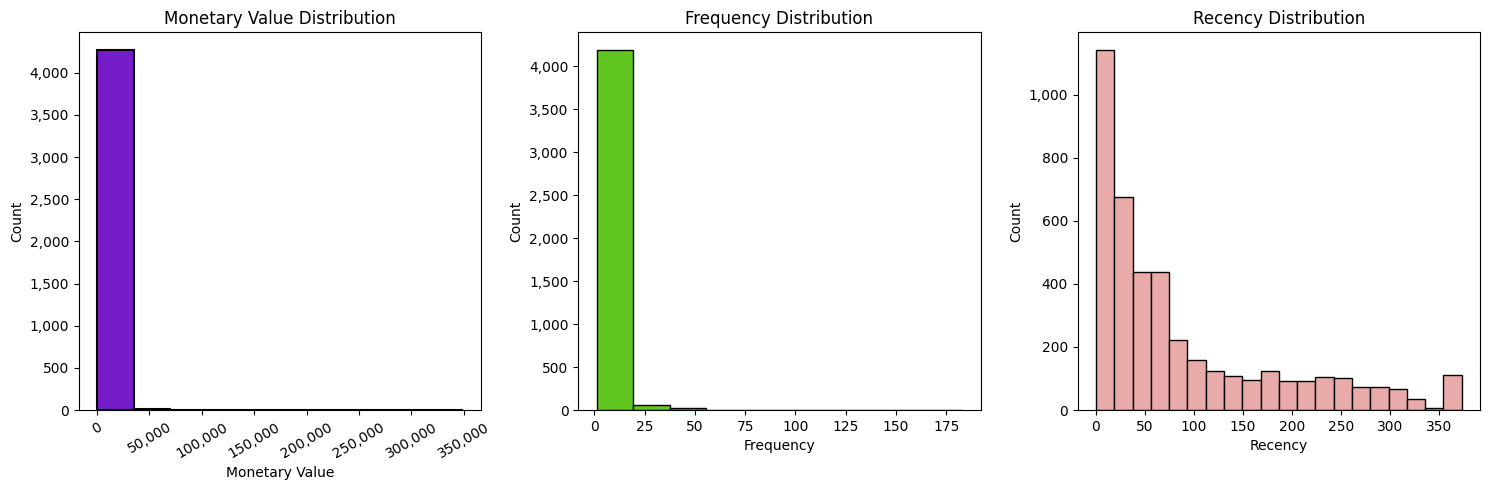

In [234]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1) #For reference, the first 1 means the plot will have 1 row, the 3 is for three columns, and the second 1 is for this subplot's position to be in the first column
plt.hist(adf['MonetaryValue'], bins=10, color='#751DC9', edgecolor='black', lw = 1.5) #Wanted the linewith to be slightly bigger since it was harder to see on the dark puruple color
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')
plt.xticks(rotation = 30)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(comma))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(comma))

plt.subplot(1, 3, 2) #The 2 here means this subplot is in the second column
plt.hist(adf['Frequency'], bins=10, color='#61C620', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(comma))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(comma))

plt.subplot(1, 3, 3) #And the second 3 means that this subplot is going to go in the third column
plt.hist(adf['Recency'], bins=20, color='#E9ABA9', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(comma))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(comma))

plt.tight_layout()
plt.show()


Look like all these plots are really skewed left. Recency looks decent enough but frequency and monetary value are really skewed.

Let's look at some box plots of this data as well...

### Feature Box Plots

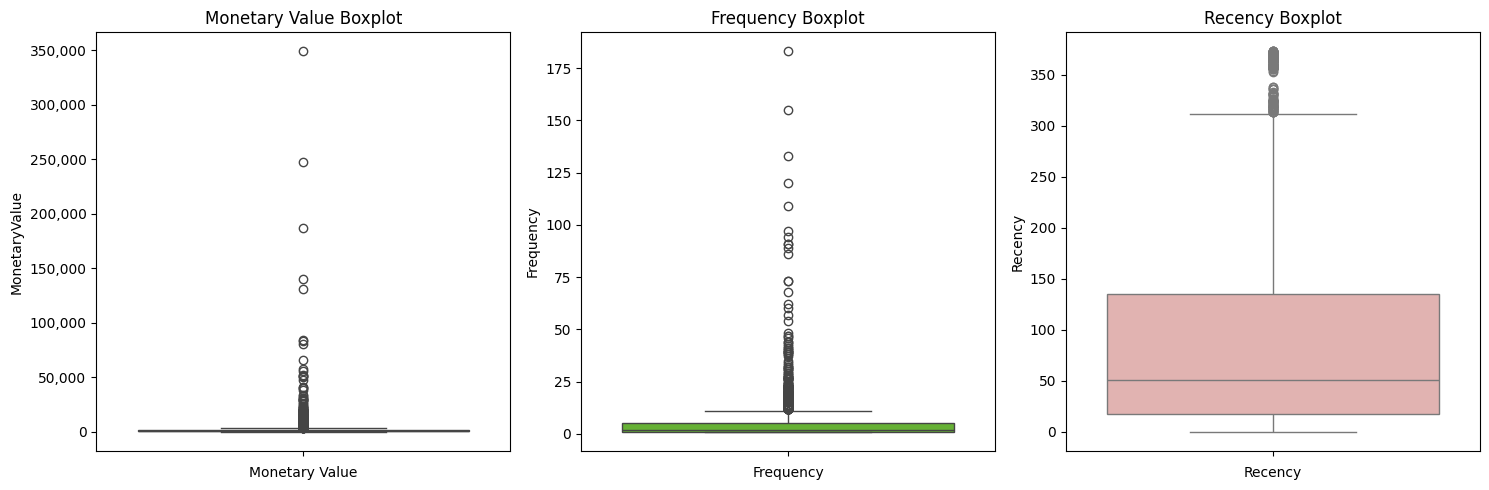

In [235]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=adf['MonetaryValue'], color='#751DC9')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(comma)) #Don't need to do this for x axis this time as there are no values on the x axis for this plot

plt.subplot(1, 3, 2)
sns.boxplot(data=adf['Frequency'], color='#61C620')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(comma))

plt.subplot(1, 3, 3)
sns.boxplot(data=adf['Recency'], color='#E9ABA9')
plt.title('Recency Boxplot')
plt.xlabel('Recency')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(comma))

plt.tight_layout()
plt.show()

So yep, recency is looking fine, but the other two are horribly skewed with lots of outliers. Looks like some customers just have some bottomless pockets 🤑🤑🤑

Let's resolve this outlier issue. We aren't going to remove them outright though, since the outliers are still real customers.

We will seperate out the outliers to use in different analysis, but not include them in the K Means cluster coming later

### Removing Outliers

In [236]:
M_Q1 = adf['MonetaryValue'].quantile(.25) #1st quartile
M_Q3 = adf['MonetaryValue'].quantile(.75) #3rd quartile
M_IQR = M_Q3 - M_Q1 #IQR = Interquartile range
monetary_outliers_df = adf[(adf['MonetaryValue'] > (M_Q3 + (1.5*M_IQR))) | (adf['MonetaryValue'] < (M_Q1 - (1.5*M_IQR)))].copy() #1.5 * the IQR is the generally accepted definiton of an outlier

monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


We have 423 outliers, which actually isn't that much in comparison to the whole dataset (there are 4285 unique customers)

In [237]:
F_Q1 = adf['Frequency'].quantile(.25)
F_Q3 = adf['Frequency'].quantile(.75)
F_IQR = F_Q3 - F_Q1
frequency_outliers_df = adf[(adf['Frequency'] > (F_Q3 + (1.5* F_IQR))) | (adf['Frequency'] < (F_Q1 - (1.5* F_IQR)))].copy()
frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


Once again not a ton of outliers relative to the amount of unique customers. Someone really loves shopping here though, as one outlier customer has 183 purchases 😳

This person is not necessarily a member of the monetary outliers group, but there is likely some overlap between the two sets of outliers. I'd imagine someone with 183 purchases is proabably  also buying some expensive things.

In [238]:
# This symbol "~" means "not"
non_outliers_df = adf[(~adf.index.isin(monetary_outliers_df.index)) & (~adf.index.isin(frequency_outliers_df.index))] 
# Index in adf that is NOT (~) in monetary_outliers_df and NOT (~) in frequency_outliers_df

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


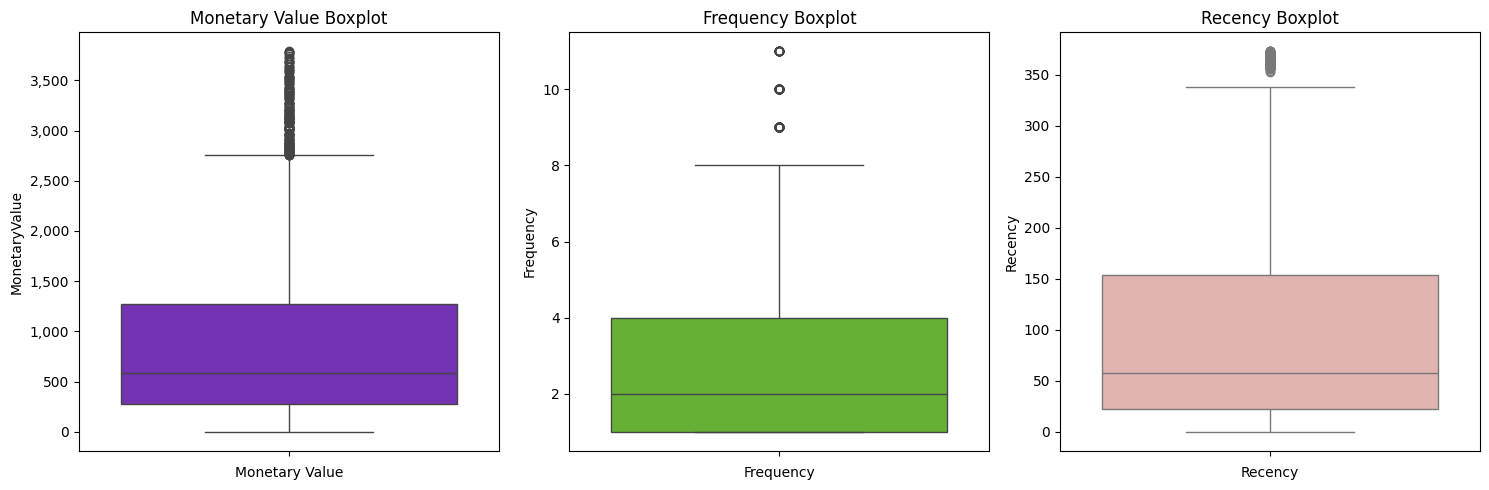

In [239]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='#751DC9')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(comma))

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='#61C620')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(comma))

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='#E9ABA9')
plt.title('Recency Boxplot')
plt.xlabel('Recency')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(comma))

plt.tight_layout()
plt.show()

This looks MUCH better now that we got rid of those outliers 
  - The plots still show outliers anyway since in this df that got rid of the outliers, now that means there is a new Q1 and Q3 and IQR and so on... so there are new outliers based on those new Quartiles. They are not a problem we need to address

### 3D Scatter Plot of Custmer Data

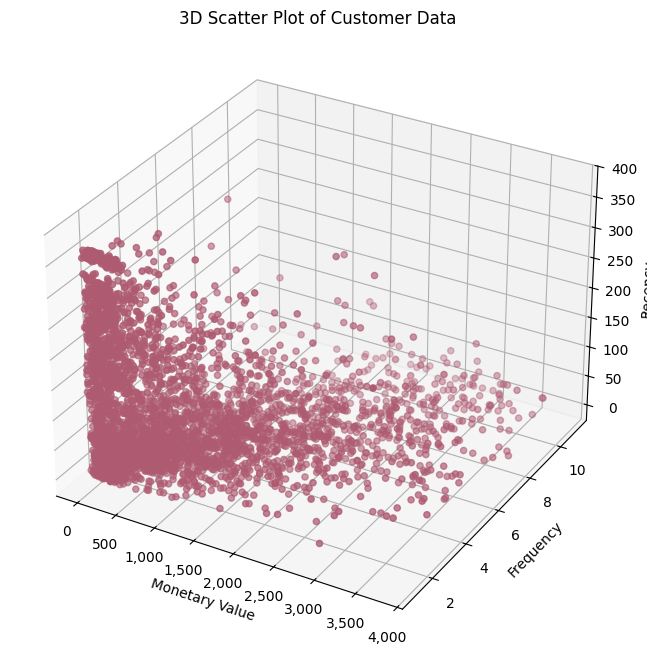

In [240]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(projection = "3d")

scatter = ax.scatter(
    non_outliers_df['MonetaryValue'],
    non_outliers_df['Frequency'],
    non_outliers_df['Recency'], 
    color = '#ae5b71'
    )

ax.set_xlabel("Monetary Value")
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(comma))

plt.show()

Now we need to do some scaling, as you can see all three axis are in different  orders of magnitiude. By scaling, we can ensure that in the KMeans cluster, none of these categories is being overemphasized.

Standard scaling transforms the features of your data to have a mean of 0 and a standard deviation of 1, ensuring that each feature contributes equally to the analysis.
$$\mathcal{z} = \frac{\mathcal{x} - \mu}{\sigma}$$ 
Where:
- **$\mathcal{z}$** is the standardized value,
- **$\mathcal{x}$** is the original value,
- **$\mu$** is the mean of the feature,
- **$\sigma$** is the standard deviation of the feature.

(Note: this formula assumes the data is normally distributed. This dataset doesn't appear to be normally distributed, but for the sake of example let's assume it is)

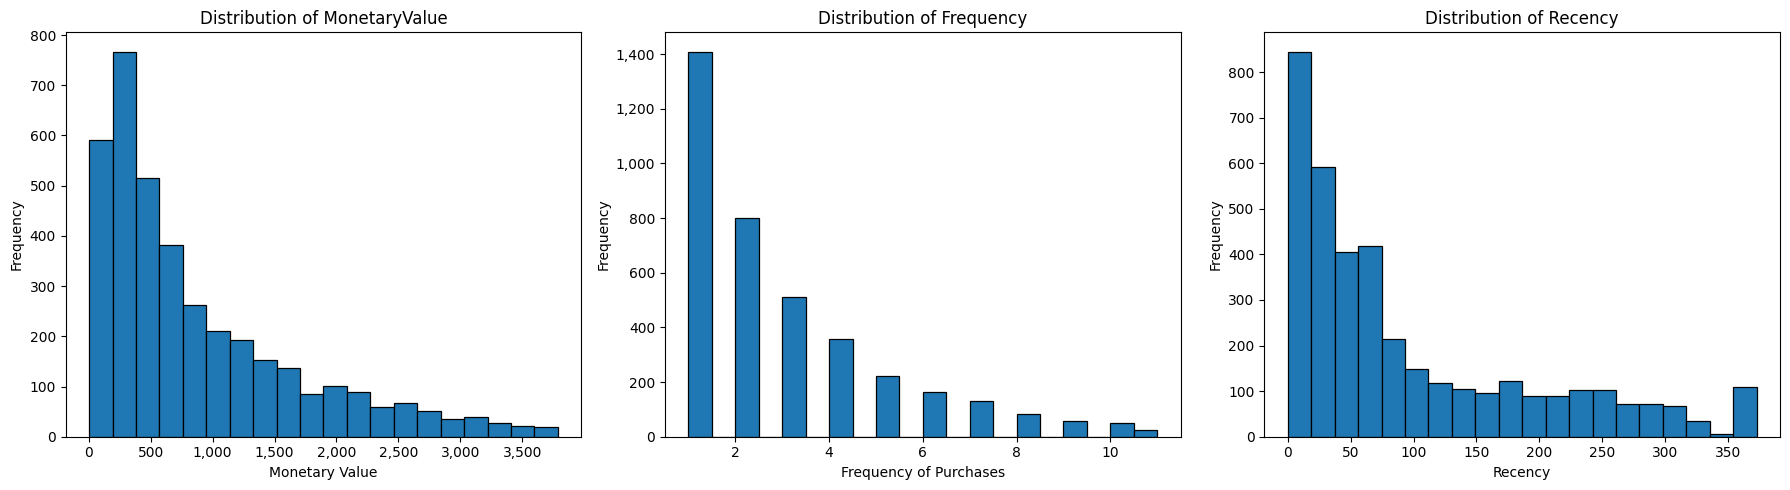

In [241]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

#Notes for myself since I haven't used fig, axes before...
#fig:
    #Purpose: Represents the entire window or page on which you plot. It’s the top-level container for all plot elements.
    #Functions: You can adjust the size, save the figure, and manage overall plot settings using fig.
#axes:
    #Purpose: Represents individual plots or subplots within the Figure. Each Axes object contains the actual plot (including data, labels, ticks, etc.).
    #Functions: You use Axes objects to set titles, labels, plot data, etc.

axes[0].hist(non_outliers_df['MonetaryValue'].dropna(), bins=20, edgecolor='black', lw = 0.9)
axes[0].set_title('Distribution of MonetaryValue')
axes[0].set_xlabel('Monetary Value')
axes[0].set_ylabel('Frequency')
axes[0].xaxis.set_major_formatter(ticker.FuncFormatter(comma))

axes[1].hist(non_outliers_df['Frequency'].dropna(), bins=20, edgecolor='black', lw = 0.9)
axes[1].set_title('Distribution of Frequency')
axes[1].set_xlabel('Frequency of Purchases')
axes[1].set_ylabel('Frequency')
axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(comma))

axes[2].hist(non_outliers_df['Recency'].dropna(), bins=20, edgecolor='black', lw = 0.9)
axes[2].set_title('Distribution of Recency')
axes[2].set_xlabel('Recency')
axes[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


In [242]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

Now we need to convert this array back to a df -->

In [243]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=('MonetaryValue', 'Frequency', 'Recency'))
scaled_data_df.head()

,MonetaryValue,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89


### Scaled 3D Scatter Plot of Customer Data

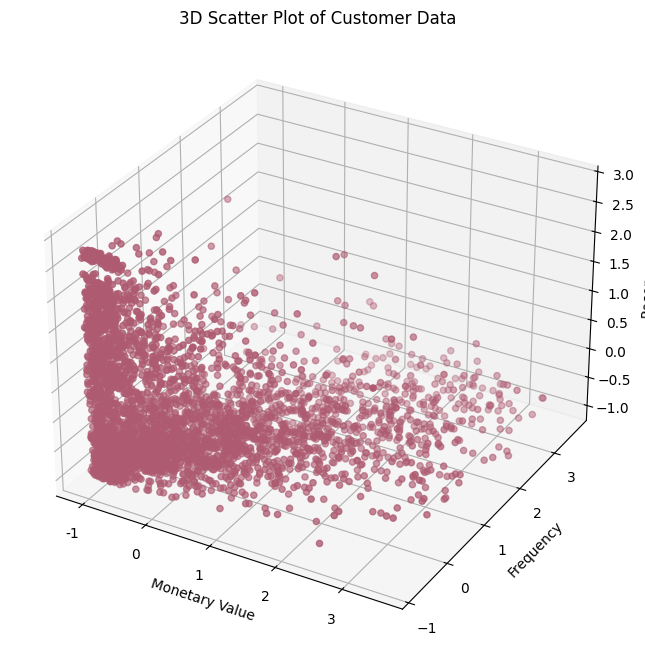

In [244]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(projection = "3d")

scatter = ax.scatter(
    scaled_data_df['MonetaryValue'],
    scaled_data_df['Frequency'],
    scaled_data_df['Recency'], 
    color = '#ae5b71'
    )

ax.set_xlabel("Monetary Value")
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(comma))

plt.show()

So as you can see, the shape of the data is the same, but the values on the axis have been scaled. So this data is good to go!

# KMeans Clustering 🥇🥈🥉

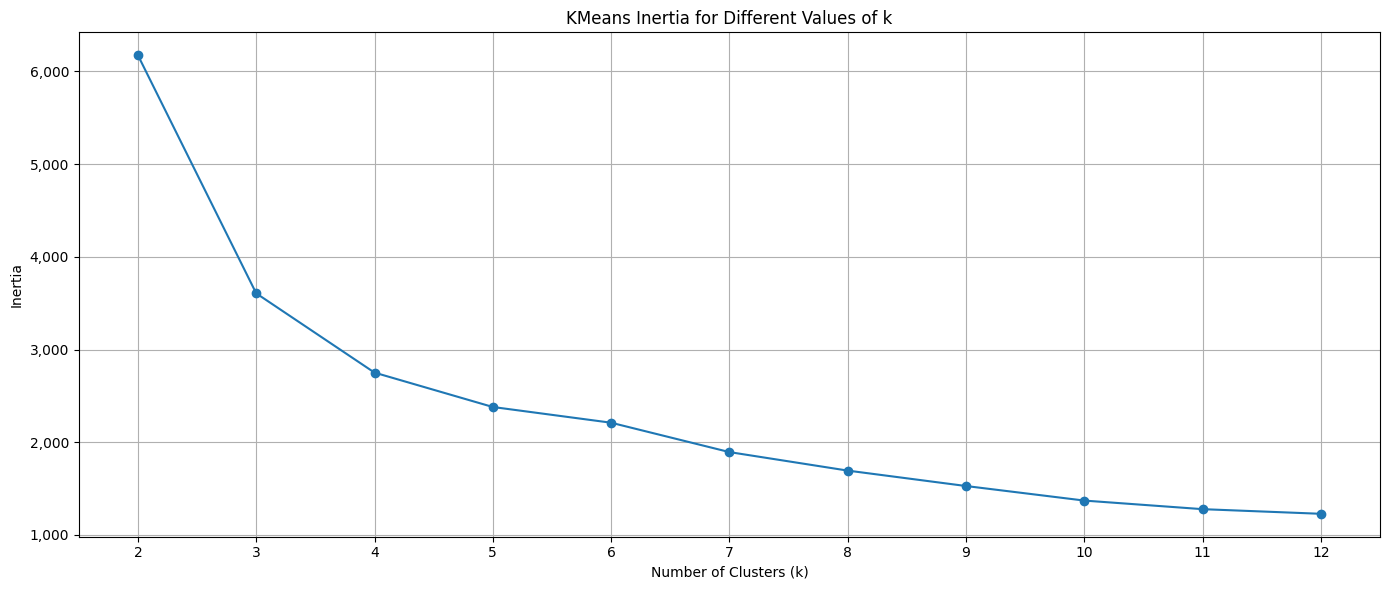

In [245]:
max_k = 12 #The K refers to the number of clusters

inertia = [] #Inertia is the average distance between the cluster centers and the data points
k_values = range(2, max_k + 1) #Doesn't make sense to start at 1, since that would just be the data we already have

for k in k_values:

    kmeans = KMeans(n_clusters = k, random_state=42, max_iter=1000) 
    #Setting a random state ensures this is reproducable. Like the seed in the random number generator in numpy. max_iter is the number of iterations to go through

    kmeans.fit_predict(scaled_data_df)

    inertia.append(kmeans.inertia_)

plt.figure(figsize= (14,6))

plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(comma))
plt.grid(True)

plt.tight_layout()
plt.show()

So it looks like we get the most value/most efficient from having 4 or 5 clusters, we don't gain much performance by going past 5 clusters.

Let's use silhouette score to determine bewteen using 4 and 5

### Silhouette Score

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Where:
- $s(i)$ is the silhouette score for a single sample $i$
- $a(i)$ is the average distance between $i$ and all other points in the same cluster,
- $b(i)$ is the minimum average distance between $i$ and all points in the nearest cluster to which $i$ does not belong.

The silhoutte score ranges between $[-1, 1]$, a higher value indicates more distinct clusters. (High silhouette score indicates a low amount of overlap between the clusters)

It is called silhouette score so think of it as the clusters <u>overshadowing</u> each other.

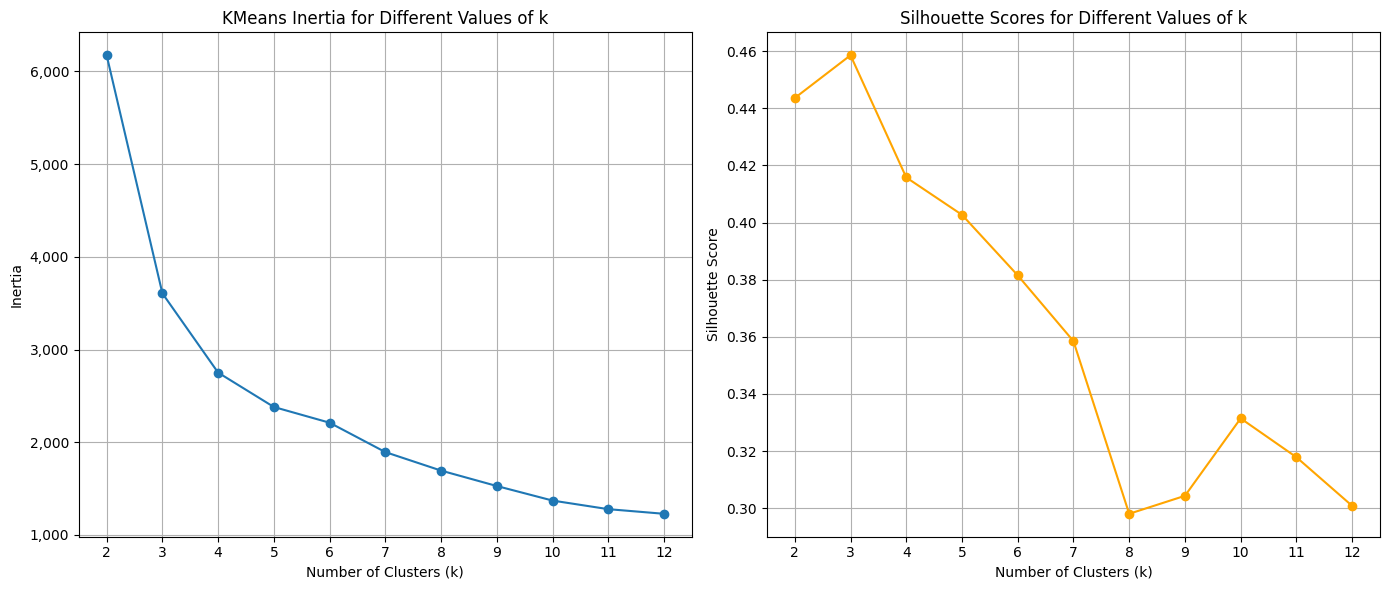

In [246]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)
    
    inertia.append(kmeans.inertia_)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(comma))
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

4 has a better silhouette score than 5, show we will go with using 4 clusters as it will have less overlap

Generally having less clusters is better since it introduces less data for you to have to go over later

In [247]:
kmeans = KMeans(n_clusters=4, random_state= 42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([1, 0, 2, ..., 1, 0, 0], dtype=int32)

In [248]:
non_outliers_df["Cluster"] = cluster_labels #Add cluster labels data to a column in the df

non_outliers_df

C:\Users\Colin\AppData\Local\Temp\ipykernel_16488\966698280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels #Add cluster labels data to a column in the df


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,0


### 3D Scatter Plot with Clusters

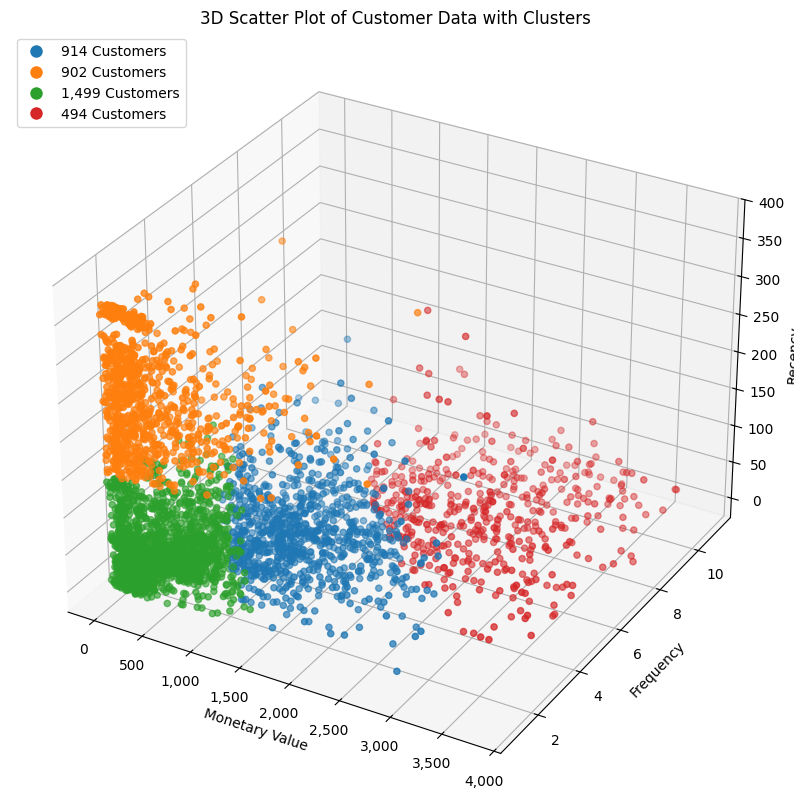

In [249]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

cluster_counts_df = non_outliers_df.groupby('Cluster').size().reset_index(name='count')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], 
                     non_outliers_df['Frequency'], 
                     non_outliers_df['Recency'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(comma))

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data with Clusters')

handles = []
for cluster, color in cluster_colors.items():
    count = cluster_counts_df.loc[cluster_counts_df['Cluster'] == cluster, 'count'].iloc[0]
    
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'{count:,} Customers')) #This adds the colored dot and text to the legend

# Add the legend to the plot
ax.legend(handles=handles, loc='upper left')

plt.show()

Orange Cluster: Low Monetary Value, Mid to Low Frequency, and Low Recency

Green Cluster: Low Monetary Value, Low Frequency, but High Recency

Blue Cluster: Pretty much in the middle for all features

Red Cluster: High Monetary Value, High Frequency, High Recency. Big spenders 💰

Let's use a violin plot to further examine this data
### Violin Plot

Basically an advanced box plot since it shows the distribution as well

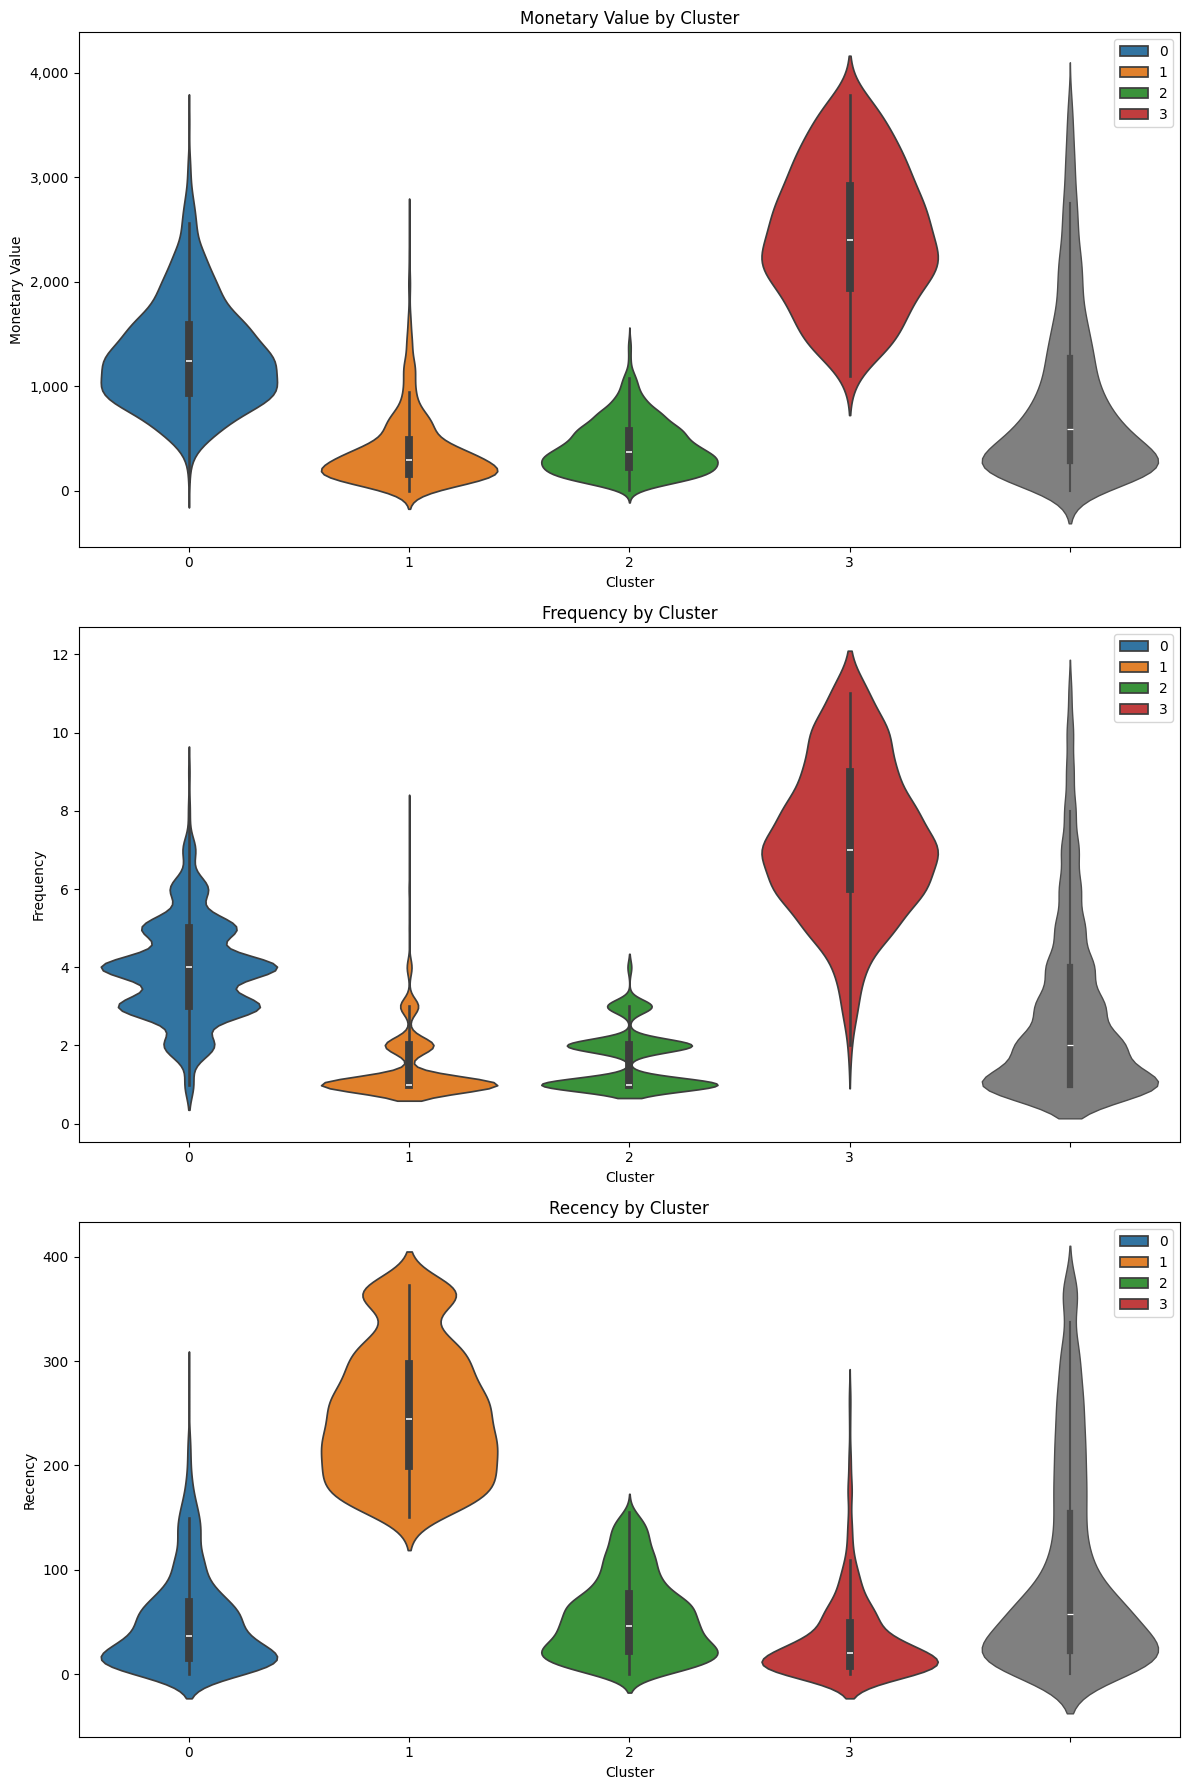

In [250]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0) #Reference plot of full set of data without clusters
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(comma))
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()


1. Cluster 0 (Blue) RETAIN:
* This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
  * Implement loyalty programs, personalized offers, and regular engagement like emailing them to ensure they remain active.

2. Cluster 1 (Orange) RE-ENGAGE:
* This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
  * Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

3. Cluster 2 (Green) NURTURE:
* This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
  * Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

4. Cluster 3 (Red) REWARD:
* This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
  * Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

# Outliers 🚩

Let's not forget about those outliers we took out of our clustering dataset earlier.

Some of the customers in one outlier set may be present in the other outlier set too, or they may not. Let's make 3 new clusters to represent them.

In [251]:
monetary_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
9,12357.00,11229.99,1,2010-11-16 10:05:00,23
25,12380.00,4782.84,4,2010-08-31 14:54:00,100
42,12409.00,12346.62,4,2010-10-15 10:24:00,55
48,12415.00,19468.84,4,2010-11-29 15:07:00,10
61,12431.00,4145.52,11,2010-12-01 10:03:00,8
...,...,...,...,...,...
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41
4253,18251.00,21964.14,8,2010-09-20 13:26:00,80


In [252]:
frequency_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
65,12437.00,6834.99,20,2010-11-09 14:46:00,30
84,12471.00,17721.45,44,2010-11-30 14:35:00,9
85,12472.00,10426.48,13,2010-12-05 14:19:00,4
92,12482.00,21941.72,27,2010-05-12 16:51:00,211
115,12523.00,2330.38,12,2010-11-30 12:31:00,9
...,...,...,...,...,...
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41
4250,18245.00,3757.92,13,2010-11-25 16:52:00,14


In [253]:
overlap_indicies = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

overlap_indicies

Index([  65,   84,   85,   92,  126,  145,  164,  179,  202,  203,
       ...
       4107, 4125, 4143, 4156, 4200, 4235, 4236, 4237, 4241, 4262],
      dtype='int64', length=226)

In [254]:
monetary_only_outliers = monetary_outliers_df.drop(overlap_indicies)
monetary_only_outliers

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
9,12357.00,11229.99,1,2010-11-16 10:05:00,23
25,12380.00,4782.84,4,2010-08-31 14:54:00,100
42,12409.00,12346.62,4,2010-10-15 10:24:00,55
48,12415.00,19468.84,4,2010-11-29 15:07:00,10
61,12431.00,4145.52,11,2010-12-01 10:03:00,8
...,...,...,...,...,...
4117,18052.00,10877.18,1,2010-05-24 11:11:00,199
4120,18055.00,4411.38,6,2010-12-07 09:13:00,2
4147,18092.00,7111.18,8,2010-12-09 10:00:00,0
4205,18178.00,4512.93,7,2010-11-02 17:24:00,37


In [255]:
frequency_only_outliers = frequency_outliers_df.drop(overlap_indicies)
pd.concat([frequency_only_outliers.head(5), frequency_only_outliers.tail(5)]) #Had to use this since the df was big but not big enough to be automatically abbreviated with the ...

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
115,12523.00,2330.38,12,2010-11-30 12:31:00,9
309,12841.00,3518.33,17,2010-12-05 12:15:00,4
489,13082.00,3722.12,12,2010-10-11 14:19:00,59
519,13117.00,1658.90,12,2010-12-09 14:50:00,0
599,13230.00,3543.31,17,2010-12-09 19:28:00,0
4056,17969.00,2141.74,18,2010-07-25 13:08:00,137
4059,17975.00,2540.02,12,2010-12-08 11:38:00,1
4129,18065.00,3453.80,14,2010-11-16 10:05:00,23
4161,18109.00,1840.99,13,2010-12-05 10:58:00,4
4250,18245.00,3757.92,13,2010-11-25 16:52:00,14


In [256]:
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indicies]

monetary_and_frequency_outliers

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
65,12437.00,6834.99,20,2010-11-09 14:46:00,30
84,12471.00,17721.45,44,2010-11-30 14:35:00,9
85,12472.00,10426.48,13,2010-12-05 14:19:00,4
92,12482.00,21941.72,27,2010-05-12 16:51:00,211
126,12540.00,7670.25,15,2010-11-26 10:43:00,13
...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41


In [257]:
monetary_only_outliers['Cluster'] = -1  
frequency_only_outliers['Cluster'] = -2
monetary_and_frequency_outliers['Cluster'] = -3
#The negative values show that we manually entered them, and they were not produced from the Kmeans clustering
monetary_only_outliers['Cluster Note'] = 'monetary only outliers'.title()
frequency_only_outliers['Cluster Note'] = 'frequency only outliers'.title()
monetary_and_frequency_outliers['Cluster Note'] = 'monetary and frequency outliers'.title()
#I added this cluster note column just for the sake of making the violin plot x axis label easier to understand

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])
outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,Cluster Note
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,-1,Monetary Only Outliers
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,-1,Monetary Only Outliers
42,12409.00,12346.62,4,2010-10-15 10:24:00,55,-1,Monetary Only Outliers
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,-1,Monetary Only Outliers
61,12431.00,4145.52,11,2010-12-01 10:03:00,8,-1,Monetary Only Outliers
...,...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3,Monetary And Frequency Outliers
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3,Monetary And Frequency Outliers
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3,Monetary And Frequency Outliers
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3,Monetary And Frequency Outliers


### Outlier Violin Plot

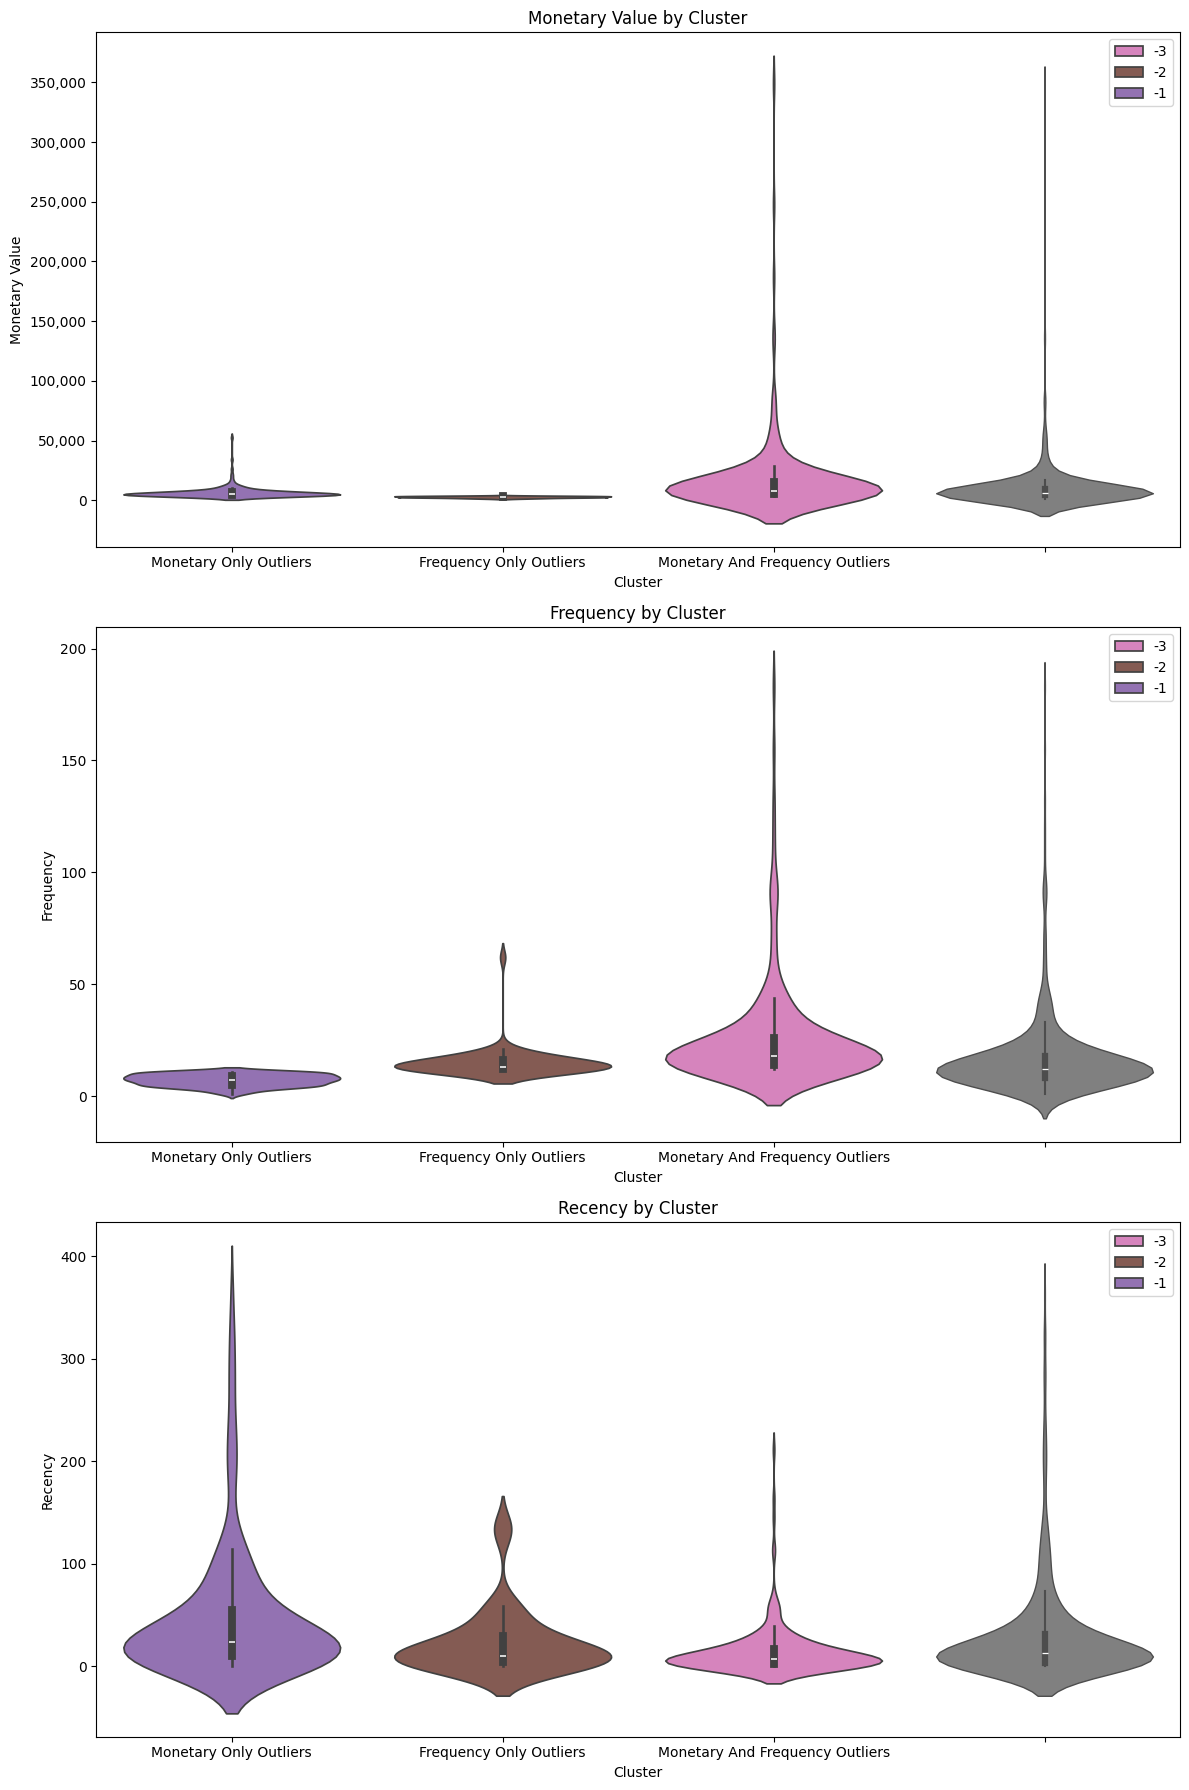

In [258]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster Note'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(comma))
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')
plt.xlabel("Cluster")

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster Note'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')
plt.xlabel("Cluster")

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster Note'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')
plt.xlabel("Cluster")

plt.tight_layout()
plt.show()

1. Cluster -1 (Monetary Outliers) PAMPER:
* High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.
  * Potential Strategy: *Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

2. Cluster -2 (Frequency Outliers) UPSELL:
* Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.
  * Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

3. Cluster -3 (Monetary & Frequency Outliers) DELIGHT:
* The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.
  * Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

# Final Visualization 📊

Now we need to union the outlier and non outlier clusters together

In [259]:
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [260]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df]).drop('Cluster Note', axis = 1) 
#Don't need this note anymore since we already used it in that violin plot of outliers. Gonna add it back in the next section including the non outlier clusters

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


In [261]:
full_clustering_df['ClusterLabel'] = full_clustering_df['Cluster'].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1,RE-ENGAGE
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0,RETAIN
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2,NURTURE
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0,RETAIN
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2,NURTURE
...,...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3,DELIGHT
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3,DELIGHT
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3,DELIGHT
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3,DELIGHT


### Visualization

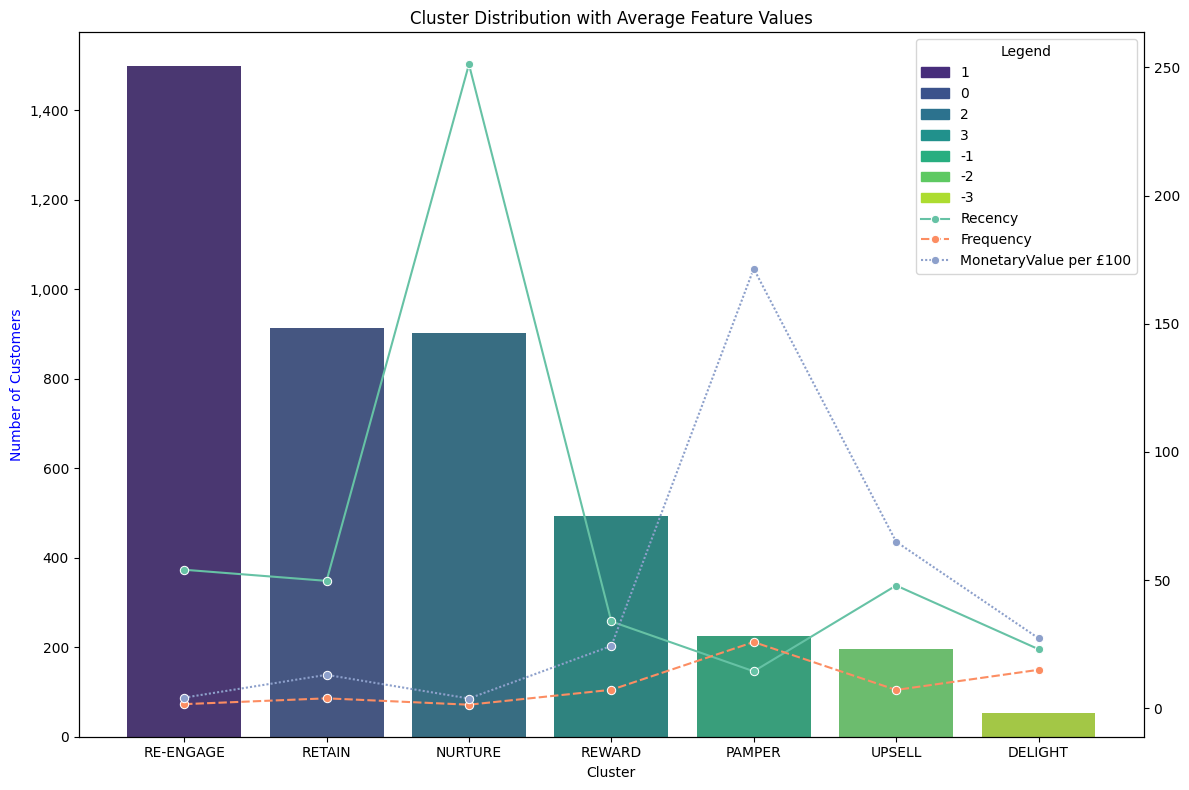

In [262]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()  #Counts number of customers per cluster
full_clustering_df["MonetaryValue per £100"] = full_clustering_df["MonetaryValue"] / 100.00
#Needed this since the Monetary value for the delight label is so large you couldn't see some of the line graph very well
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per £100']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(comma))
plt.xlabel('Cluster')
#You don't need to add the line below as it uses the ClusterLabel automatically, but if you want to change what the x axis says then use this syntax
plt.xticks(ticks=cluster_counts.index, labels=full_clustering_df['ClusterLabel'].unique())


ax2 = ax1.twinx()  #Allows for 2 axes
sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')

#Manually creating a single legend for both bar and line plots
cluster_labels = full_clustering_df['Cluster'].unique()
bar_colors = sns.color_palette('viridis', len(cluster_labels))

#Create handles for bar plot legend (handles are the icons in the legend, the rectangles and lines with dot)
bar_handles = [plt.Rectangle((0, 0), 1, 1, color=bar_colors[i]) for i in range(len(cluster_labels))]


line_handles, line_labels = ax2.get_legend_handles_labels()

#Add the legend
ax1.legend(bar_handles + line_handles, list(cluster_labels) + line_labels, title='Legend', loc='upper right')

ax2.legend_.remove() #Have to turn this off or else there will be 2 overlapping legends. And you can't say legend = False as an argument cause the new legend won't have the lineplot data

plt.tight_layout()
plt.show()


In [263]:
full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel,MonetaryValue per £100
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1,RE-ENGAGE,1.69
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0,RETAIN,13.23
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2,NURTURE,2.21
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0,RETAIN,22.21
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2,NURTURE,3.01
...,...,...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3,DELIGHT,75.16
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3,DELIGHT,75.45
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3,DELIGHT,66.51
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3,DELIGHT,47.92


Final Data Frame with the information from the graph above displayed in tabular form

In [264]:
feature_counts = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per £100']].count()
feature_counts = feature_counts.rename(columns={'Recency': '# of Customers', "Frequency":'Freq', 'MonetaryValue per £100': 'MV'}) #needed to do this since the drop later was dropping multiple columns since they were named the same
final_df = pd.concat([feature_means, feature_counts], axis =1)
final_df = final_df.drop(final_df.columns[[4,5]], axis=1)
final_df = final_df[['# of Customers', 'Recency', 'Frequency', 'MonetaryValue per £100']]
final_df = final_df.rename(columns={'Recency': 'Avg Recency', 'Frequency': 'Avg Frequency','MonetaryValue per £100': 'Avg Monetary Value per £100' })
#Another way to do this reordering of the columns would be...
    #cols = ['# of Customers'] + [col for col in final_df.columns if col != '# of Customers']
    #final_df = final_df[cols]

final_df = final_df.reset_index() #The groupby on the first line was setting the ClusterLabel column as the index

cluster_labels_inverse = { #Had to do this cause the other dictionary cluster_labels had the key and item in the wrong order for what I wanted to do at this part
    'DELIGHT': -3,
    'NURTURE': 2,
    'PAMPER': -1,
    'RE-ENGAGE': 1,
    'RETAIN': 0,
    'REWARD': 3,
    'UPSELL': -2
}

final_df['Cluster'] = final_df['ClusterLabel'].map(cluster_labels_inverse)
final_df = final_df[['ClusterLabel', 'Cluster', '# of Customers', 'Avg Recency', 'Avg Frequency', 'Avg Monetary Value per £100']]
final_df = final_df.sort_values(by = 'Cluster')
final_df.reset_index().drop('index', axis = 1)
#Had to drop index cause sorting by cluster had the index out of order and resetting the index added a column named index that retained those out of order values


,ClusterLabel,Cluster,# of Customers,Avg Recency,Avg Frequency,Avg Monetary Value per £100
0,DELIGHT,-3,226,14.45,25.87,171.48
1,UPSELL,-2,53,23.08,15.04,27.35
2,PAMPER,-1,197,47.91,7.19,64.98
3,RETAIN,0,914,49.73,3.91,13.09
4,RE-ENGAGE,1,902,251.17,1.43,3.85
5,NURTURE,2,1499,54.07,1.64,4.18
6,REWARD,3,494,33.89,7.24,24.36


<b>The next step after this would be to automate the process for every time you get a new set of customer data 😎</b>